<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Sesi%C3%B3n_6_An%C3%A1lisis_de_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de Regresión
<img src="https://www.grupolambda.com.pe/wp-content/uploads/2020/03/home-logo.png" alt="drawing" width="300"/>
<br>

 ##### Docente: Jorge Brian Alarcon Flores 

#Introducción
El modelo de regresión lineal es el primer modelo que vamos a usar en este entrenamiento. Este modelo puede ser usado para diferentes enfoques, sin embargo si lo hacemos con la teorica estadistica clásica encontramos que es una gran herramienta debido a su interpretabilidad y capacidad de hacer inferencia estadística.

#Objetivos
*   Entender el enfoque clásico de la regresión lineal
*   Hacer pruebas de hipotesis para significancia individual de paramtros
*   Usar la regresión lineal como herramienta para evaluar la significancia de una variable de interés 

Primero importamos algunas librerías para nuestro trabajo:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly

import pandas as pd
import numpy as np
import statsmodels.api as sm

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Modelo de regresión usando statsmodels
Como hemos visto hasta ahora, el desarrollo de actividades particulares como visualizar, se hace a traves de librerías adicionales. En el caso de modelos estadisticos el estandar y la herramienta mas comun ha sido statsmodels. esta libreria incorpora infinidad de herramientas de modelación como: modelos probabilisticos, analisis de series de tiempo e infinidad de pruebas estadisticas. Para ver mayor documentación: https://www.statsmodels.org/stable/user-guide.html

Para este ejemplo usaremos las ventas anuales de cafeterias en Canadá con el fin de predecir las ventas de cada una en función de sus características.

In [ ]:
url = 'https://raw.githubusercontent.com/JBrianAlicorp/Business-Analytics/master/Data_Regresi%C3%B3n.csv'
data = pd.read_csv(url)

In [ ]:
data.corr()

,area,publicidad_exterior,num_productos,delivery,ventas
area,1.000000,-0.081763,0.287728,0.263135,0.546376
publicidad_exterior,-0.081763,1.000000,0.045441,-0.005899,0.067203
num_productos,0.287728,0.045441,1.000000,0.020919,0.625677
delivery,0.263135,-0.005899,0.020919,1.000000,0.293886
ventas,0.546376,0.067203,0.625677,0.293886,1.000000


#Análisis descriptivo
Antes de iniciar la regresion podemos correr un pequeño análisis descriptivo y tener mayor intuicion del problema que analizamos:

In [ ]:
data.describe()

,area,publicidad_exterior,num_productos,delivery,ventas
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,46.055877,0.212366,20.047960,0.776882,64003.767025
std,6.428687,0.409166,6.978012,0.416524,11473.470051
min,29.806932,0.000000,5.000000,0.000000,35143.000000
25%,41.650478,0.000000,15.603763,1.000000,56872.000000
50%,45.802647,0.000000,19.184180,1.000000,62856.000000
75%,50.268284,0.000000,24.061171,1.000000,71023.250000
max,68.099009,1.000000,47.266020,1.000000,108296.000000


Veamos como se distribuyen las variables:

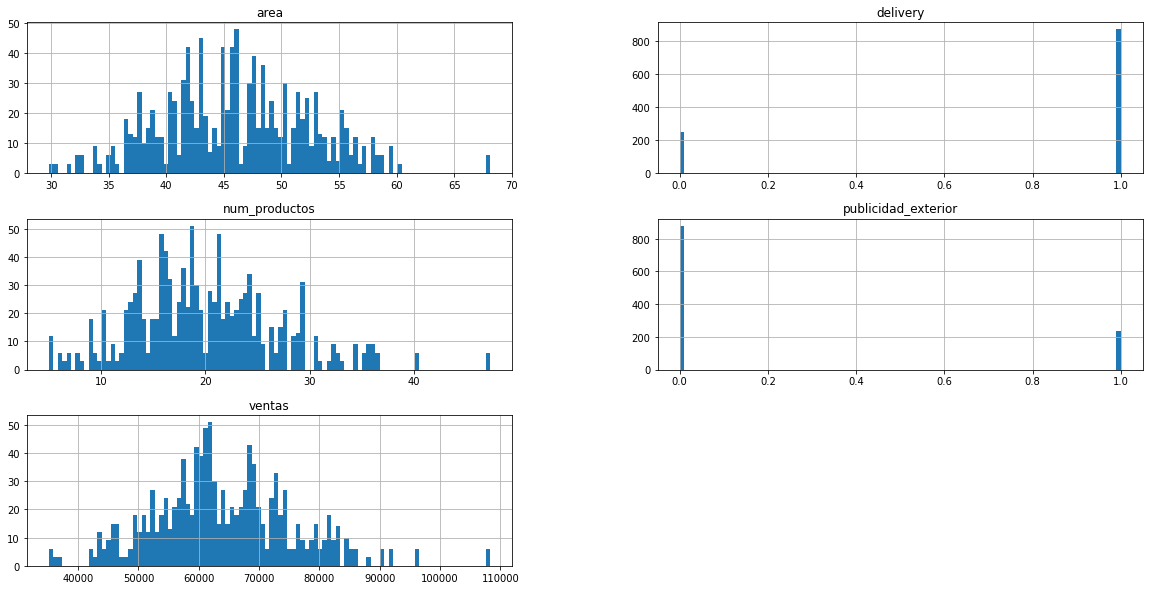

In [ ]:
data.hist(bins=100,figsize=(20,10));


#Análisis de correlación
Una vez conocido los rangos y variabilidad de los datos, nos gustaria entender como es la variación conjunta de los datos. Con esto podemos responder preguntas como:

¿Existe alguna correlación entre las variables en la información?, ¿podemos generar un modoelo a partir de esta información?

En principio queremos testear si hay presencia de multicolinealidad o si nuestras variables independientes no son buenos predictores. Luego, veamos un mapa de correlación:

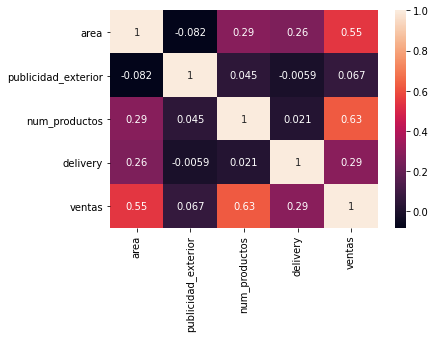

In [ ]:
sb.heatmap(data.corr(),annot=data.corr())

En princpio obervamos que nuestras variables independientes si tienen algun poder predictivo y afortunadamente no están muy correlacionadas entre ellas (correlación menor a 0.7). Observemos ahora la variación conjunta de los datos:

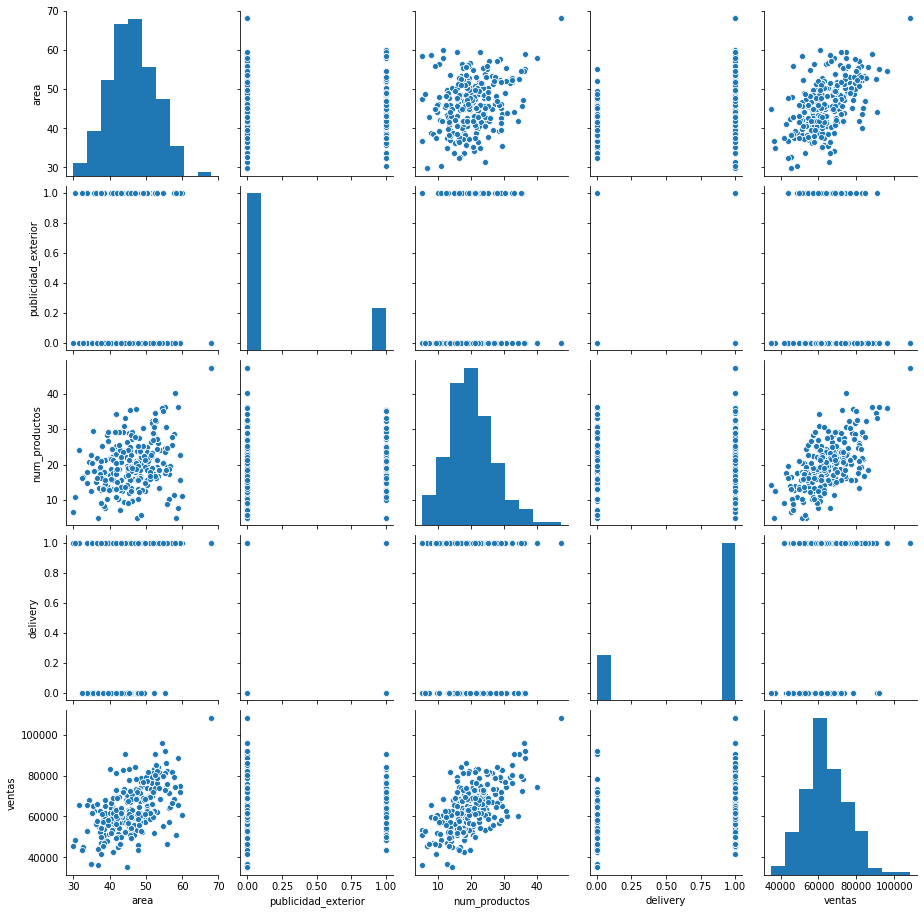

In [ ]:
sb.pairplot(data)


#Modelo de Regresión
Ahora, finalizado un analisis exploratorio inicial, queremos validar si podemos crear un modelo que permita predecir las ventas de cada cafetería a partir de sus caracteristicas. Así el modelo definido es:

$$
ventas = \beta_0 + \beta_1 * area + \beta_2 *   publicidad\_ext + \beta_3    *  num\_productos + \beta_4 *  delivery 
$$

Para correr la regresión lineal usando statsmodels hacemos:

In [ ]:
x = data[['area','publicidad_exterior','num_productos','delivery']]
#x = data[['area','num_productos']]
x['constante'] = 1
y = data[['ventas']]

mod = sm.OLS(y, x)
res = mod.fit()

Una vez estimada la regresion por MCO (OLS), podemos visualizar la tabla ANOVA:



In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     379.5
Date:                Thu, 28 May 2020   Prob (F-statistic):          5.32e-206
Time:                        22:33:48   Log-Likelihood:                -11535.
No. Observations:                1116   AIC:                         2.308e+04
Df Residuals:                    1111   BIC:                         2.310e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
area                  631.1812    


Luego el modelo final adquiere la forma:

$$
ventas = 13,339 + 631.1812 * area + 2068.5487 *   publicidad\_ext + 849.3836 *  num\_productos + 5,246.2404 *  delivery 
$$

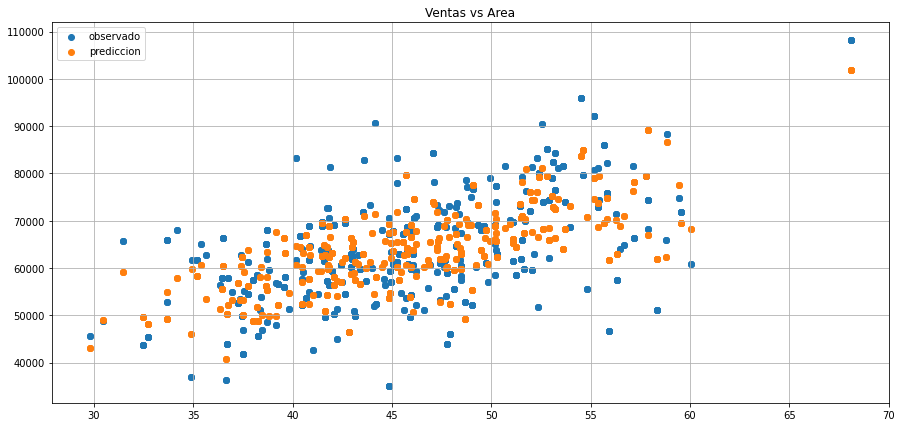

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x['area'],y,label='observado');
plt.scatter(x['area'],res.predict(x),label='prediccion');
plt.title('Ventas vs Area')
plt.legend()
plt.grid()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(res.predict(x), y)

0.2680199105191656

#Análisis de regresión
¿Qué podemos concluir de esta regresión?

¿Son significativos los efectos de las variables independientes?

¿Cómo se comportan los residuales de este modelo? ¿Son normales? ¿homocedásticos?


#Analisis de los residuales
Después de todo modelo, es bueno verificar la distribucion de los residuales:

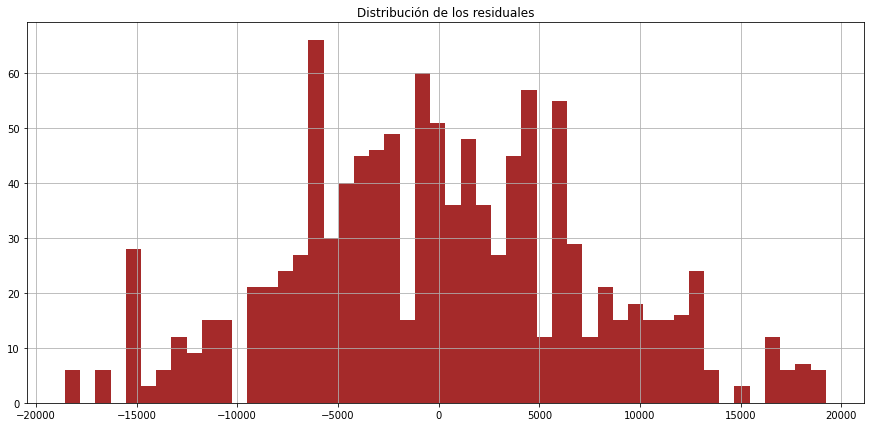

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(res.resid,bins=50,color='brown');
plt.title('Distribución de los residuales')
plt.grid()